# Data Visualization and Feature Engineering
- **Data dictionary.** - [Link](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)

-[MS SubClass](#MS-SubClass-Visualization-and-Dummy-Cell-Creation) -MS Zoning -Lot Frontage -Lot Area -Street -Alley -Lot Shape -Land Contour

-[Utilities](#Utilities-Visualization) -Lot Config -Land Slope -Neighborhood -Condition 1 -Condition 2 -Bldg Type -House Style

-[Overall Qual](#Overall-Qual-Visualization) -Overall Cond -Year Built -Year Remod/Add -Roof Style -Roof Matl -Exterior 1st -Exterior 2nd

-[Mas Vnr Type](#Mas-Vnr-Type) -Mas Vnr Area -Exter Qual -Exter Cond -Foundation -Bsmt Qual -Bsmt Cond -Bsmt Exposure

-[BsmtFin Type 1](#BsmtFin-Type-1) -BsmtFin SF 1 -BsmtFin Type 2 -BsmtFin SF 2 -Bsmt Unf SF -Total Bsmt SF -Heating -Heating QC

-[Central Air](#Central-Air) -Electrical -1st Flr SF -2nd Flr SF -Low Qual Fin SF -Gr Liv Area -Bsmt Full Bath -Bsmt Half Bath

-[Full Bath](#Full-Bath) -Half Bath -Bedroom -Total Bathrooms -AbvGr -Kitchen AbvGr -Kitchen Qual -TotRms AbvGrd -Functional 

-[Fireplaces](#Fireplaces) -Fireplace Qu -Garage Type -Garage Yr Blt -Garage Finish -Garage Cars -Garage Area -Garage Qual

-[Garage Cond](#Garage-Cond) -Paved Drive -Wood Deck SF -Open Porch SF -Enclosed Porch -3Ssn Porch -Screen Porch -Pool Area

-[Pool QC](#Pool-QC) -Fence -Misc Feature -Misc Val -Mo Sold -Yr Sold -Sale Type

-[Feature Engineering](#Feature-Engineering) - [Exporting Data](#Exporting-Cleaned-Data)

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import missingno as msno
from sklearn.preprocessing import PolynomialFeatures

## Currently using cleaned data v5

In [2]:
# importing the cleaned data
complete_housing_data = pd.read_csv("./datasets/Clean_training_data.csv")

In [3]:
complete_housing_data.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

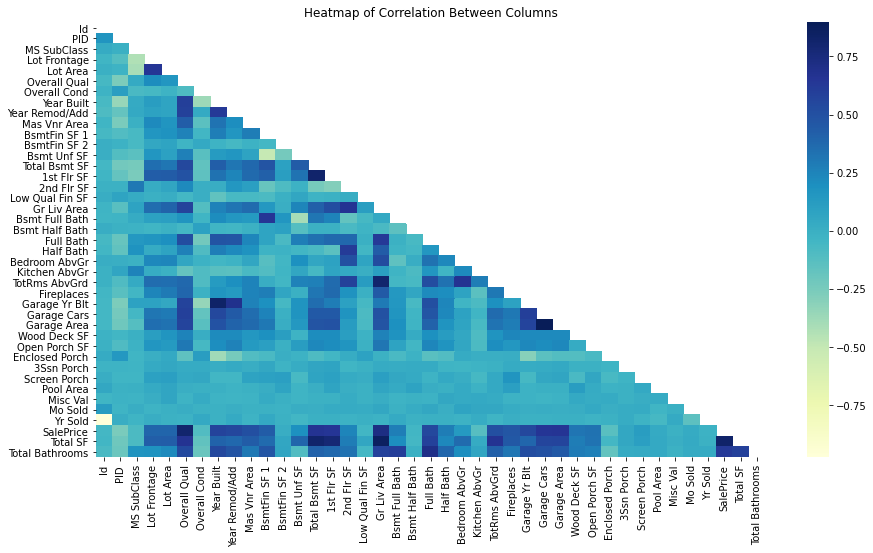

In [4]:
#MS-SubClass-Visualization-and-Dummy-Cell-Creation#Generating a heat map before I look at further trends
plt.figure(figsize=(15,8))

corr = complete_housing_data.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr,mask=mask,cmap='YlGnBu').set_title("Heatmap of Correlation Between Columns");

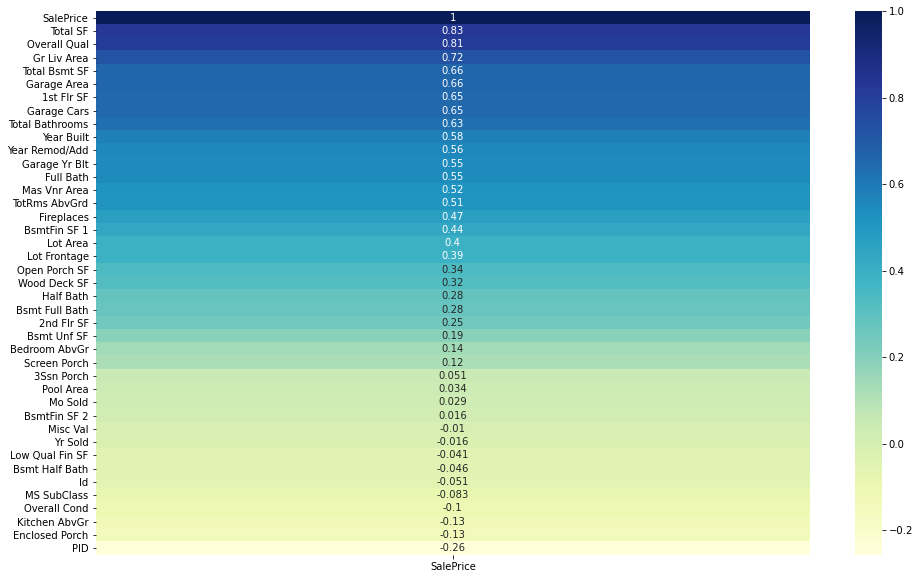

In [5]:
plt.figure(figsize=(16,10))
sns.heatmap(complete_housing_data.corr()[["SalePrice"]].sort_values(by="SalePrice",ascending=False),
            annot=True,
            cmap='YlGnBu',
            annot_kws={'fontsize':10});

### Creating a function to make an orded sns.boxplot

In [6]:
#label ratation help
#with label rotation help from https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplo
#creating a sorted boxplot
#https://datavizpyr.com/sort-boxplot-by-mean-with-seaborn-in-python/
#creating a df from .groupby 
#https://stackoverflow.com/questions/32468402/how-to-explode-a-list-inside-a-dataframe-cell-into-separate-rows

In [7]:
def ordered_boxplot(df,group,target):
    temp_dict = {"temp":[1,2]}
    new = pd.DataFrame(temp_dict)
    start = pd.DataFrame(temp_dict)
    groups = df.groupby(group)[target].apply(list)
    df_group = pd.DataFrame(groups)
    df_group = df_group.T
    for i in df_group.columns:
        new_col = df_group[i].apply(pd.Series).stack().reset_index(drop=True)
        df_new_col = pd.DataFrame(new_col)
        df_new_col.columns=[i]
        new = pd.concat([new,df_new_col],axis=1)
    new.drop(columns="temp",inplace=True)
    sorted_index = new.mean().sort_values(ascending=False).index
    df_sorted = new[sorted_index]
    plt.figure(figsize=(8,6))

    chart = sns.boxplot(data=df_sorted)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
    chart.set_xlabel(xlabel=[group],fontsize=15)
    chart.set_ylabel(ylabel=[target],fontsize=15);
    return

# MS SubClass Visualization and Dummy Cell Creation

150      1
40       4
45      11
180     11
75      16
85      28
190     43
90      75
80      86
160     88
70      89
30     101
120    132
50     196
60     390
20     752
dtype: int64

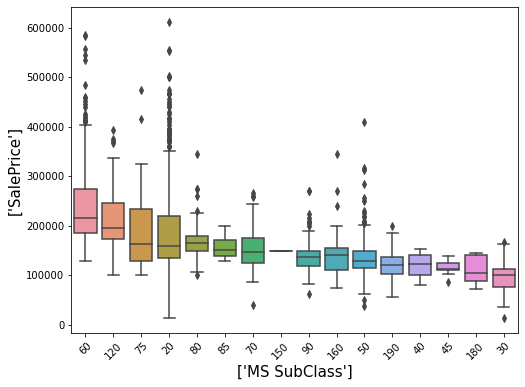

In [8]:
#used in modeling
ordered_boxplot(complete_housing_data,"MS SubClass","SalePrice")

#The MS SubClass does effect the sales price. Need to make a dummy cells for these values

ms_subclass_dummies = pd.get_dummies(complete_housing_data["MS SubClass"])
display(
    ms_subclass_dummies.sum().sort_values()
 )
#might want to leave out some __ms_subclass__ with fewer houses sold in it
#definately remove _150 and 40__


used in modeling

# MS Zoning Visualization and Dummy Cell Creation

A (agr)       1
I (all)       1
RH           14
C (all)      19
FV          101
RM          313
RL         1574
dtype: int64

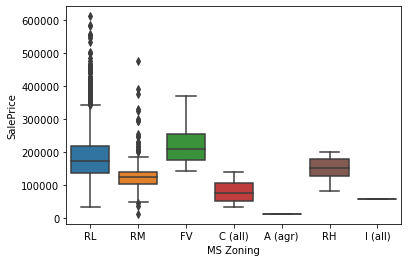

In [9]:
sns.boxplot(complete_housing_data['MS Zoning'],complete_housing_data['SalePrice'])
ms_zoning_dummies = pd.get_dummies(complete_housing_data["MS Zoning"])
display(
    ms_zoning_dummies.sum().sort_values()
)

# Lot Frontage Visualization

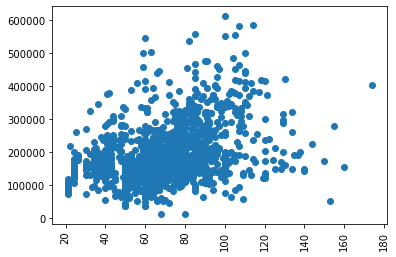

In [10]:
plt.scatter(complete_housing_data['Lot Frontage'],complete_housing_data['SalePrice'])
plt.xticks(rotation=90);

In [11]:
complete_housing_data[complete_housing_data["Lot Frontage"] > 300]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total SF,Total Bathrooms


Removed Lot frontage outlier

# Lot Area Visualization

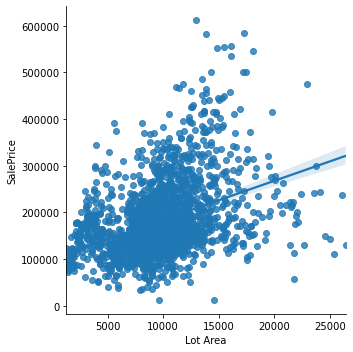

In [12]:
#used in modeling
sns.lmplot(x='Lot Area',y='SalePrice',data=complete_housing_data);

Already Removed houses with more than 30,000 sqft. This data doesn't look that linear

## Street Visualization

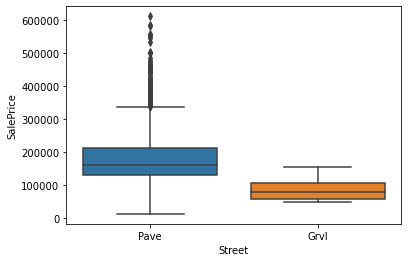

In [13]:
sns.boxplot(complete_housing_data['Street'],complete_housing_data['SalePrice']);

In [14]:
#do I need to have the drop_first=True
street_dummies = pd.get_dummies(complete_housing_data["Street"])
display(
    street_dummies.sum().sort_values()
)

Grvl       7
Pave    2016
dtype: int64

## Alley Visualization

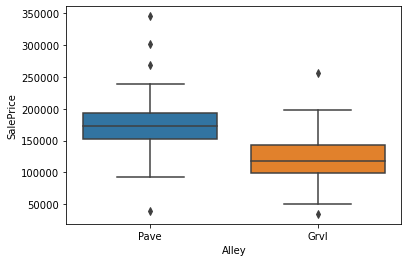

In [15]:
sns.boxplot(complete_housing_data['Alley'],complete_housing_data['SalePrice']);

In [16]:
complete_housing_data['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

So few houses have alley data. Should I enclude this data knowing that there might be nicer houses with alley data in testing data

## Lot Shape Visualization

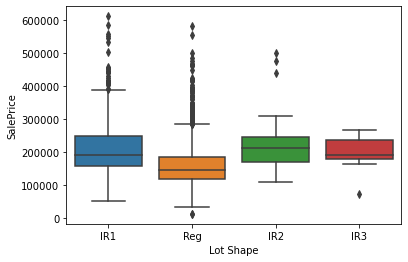

In [17]:
sns.boxplot(complete_housing_data['Lot Shape'],complete_housing_data['SalePrice']);

Doesn't seem to have a significiant effect on sales price

# Land Contour Visualization

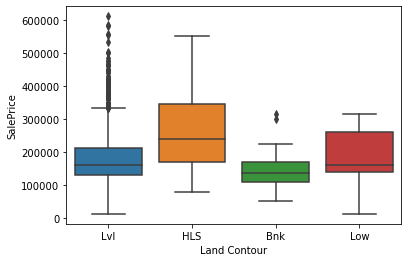

In [18]:
sns.boxplot(complete_housing_data['Land Contour'],complete_housing_data['SalePrice']);

Don't think Land contour has a significant effect on sales price

## Utilities Visualization

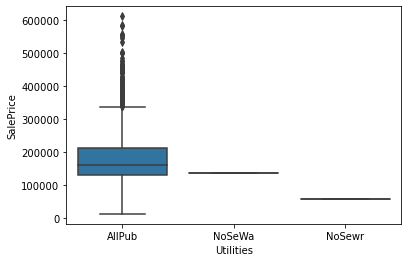

In [19]:
sns.boxplot(complete_housing_data['Utilities'],complete_housing_data['SalePrice']);

## Lot Config Visualization

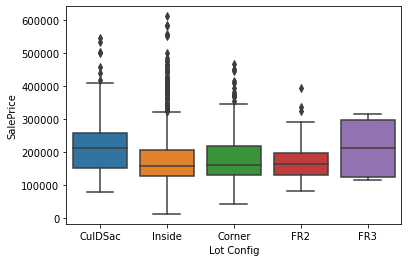

In [20]:
sns.boxplot(complete_housing_data['Lot Config'],complete_housing_data['SalePrice']);

CulDSac and FR3 have significant impact on sales price

In [21]:
lot_config_dummies = pd.get_dummies(complete_housing_data["Lot Config"])
display(
    lot_config_dummies.sum().sort_values()
)
lot_config_dummies.drop(columns=["FR3"],inplace=True)


FR3           8
FR2          59
CulDSac     122
Corner      345
Inside     1489
dtype: int64

## Land Slope Visualization

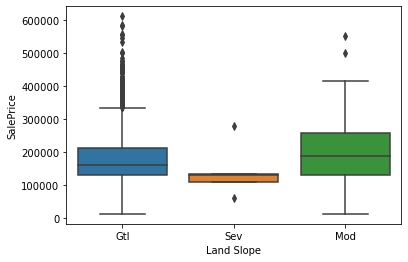

In [22]:
sns.boxplot(complete_housing_data['Land Slope'],complete_housing_data['SalePrice']);

## Neighborhood Visualization

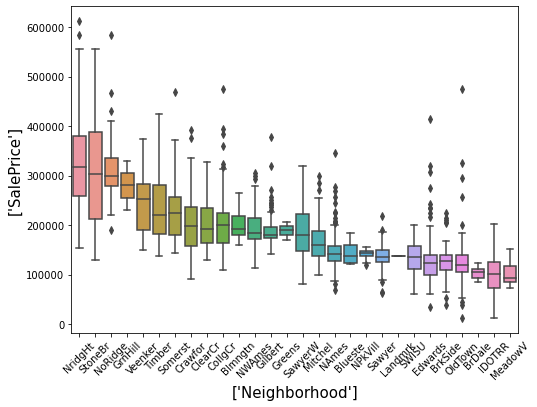

In [23]:
#used in modeling
ordered_boxplot(complete_housing_data,"Neighborhood","SalePrice")

In [24]:
neighborhood_dummies = pd.get_dummies(complete_housing_data["Neighborhood"])
display(
    neighborhood_dummies.sum().sort_values()
)
# remove Landmrk, GrnHill,Greens as there is too much variety in the values
#neighborhood_dummies.drop(columns=["Landmrk","GrnHill","Greens","Blueste"],inplace=True)

Landmrk      1
GrnHill      2
Greens       3
Blueste      6
Veenker     16
NPkVill     17
BrDale      19
ClearCr     21
Blmngtn     22
MeadowV     24
SWISU       32
StoneBr     36
Timber      46
NoRidge     47
IDOTRR      68
Crawfor     70
BrkSide     75
Mitchel     79
NWAmes      87
SawyerW     87
Sawyer     111
Gilbert    113
NridgHt    122
Somerst    130
Edwards    140
OldTown    162
CollgCr    180
NAmes      307
dtype: int64

Neighborhood has a significant impact on the sales price. Some of the neighborhoods with low sales numbers might need to be removed but some of the data definately need to be included

## Condition 1 Visualization

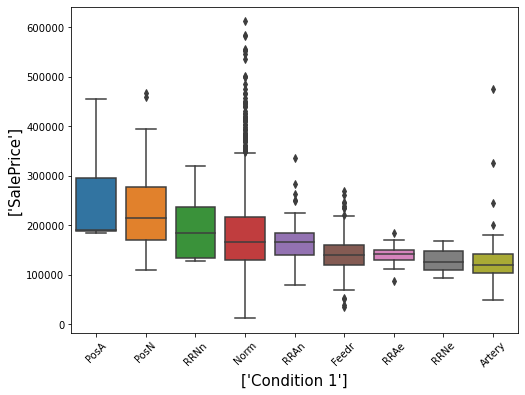

In [25]:
#used in modeling
ordered_boxplot(complete_housing_data,"Condition 1","SalePrice")
# sns.boxplot(complete_housing_data['Condition 1'],complete_housing_data['SalePrice']);

In [26]:
condition_1_dummies = pd.get_dummies(complete_housing_data["Condition 1"])
display(
    condition_1_dummies.sum().sort_values()
)
#removing RRNe and RRNn when used in modeling

RRNe         3
RRNn         6
PosA        11
RRAe        21
PosN        26
RRAn        35
Artery      68
Feedr      106
Norm      1747
dtype: int64

## Condition 2 Visualization

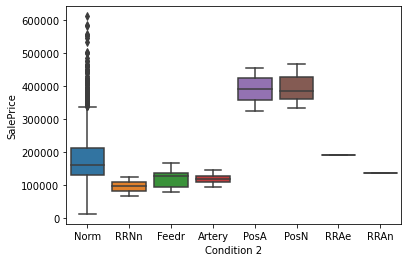

In [27]:
sns.boxplot(complete_housing_data['Condition 2'],complete_housing_data['SalePrice']);

In [28]:
condition_2_dummies = pd.get_dummies(complete_housing_data["Condition 2"])
display(
    condition_2_dummies.sum().sort_values()
)

RRAe         1
RRAn         1
RRNn         2
PosA         3
PosN         3
Artery       5
Feedr       10
Norm      1998
dtype: int64

Having a second positive conditon significantly increases price. I should include this data in model, but not the other values

## Bldg Type Visualization

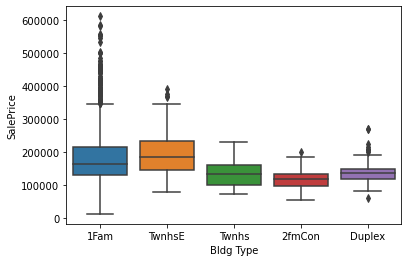

In [29]:
sns.boxplot(complete_housing_data['Bldg Type'],complete_housing_data['SalePrice']);

In [30]:
bldg_type_dummies = pd.get_dummies(complete_housing_data["Bldg Type"])
display(
    bldg_type_dummies.sum().sort_values()
)

2fmCon      43
Twnhs       69
Duplex      75
TwnhsE     161
1Fam      1675
dtype: int64

How would leaving out 1Fam effect the fit. It has the most points but doesn't really have a value as there are so many points in that family

## House Style Visualization

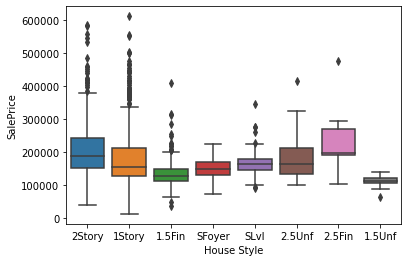

In [31]:
sns.boxplot(complete_housing_data['House Style'],complete_housing_data['SalePrice']);

In [32]:
house_style_dummies = pd.get_dummies(complete_housing_data["House Style"])
display(
    house_style_dummies.sum().sort_values()
)
# "2.5Fin","1.5Unf","2.5Unf" don't have enough data might want to remove those columns

2.5Fin       6
1.5Unf      12
2.5Unf      14
SFoyer      50
SLvl        94
1.5Fin     216
2Story     593
1Story    1038
dtype: int64

## Overall Qual Visualization

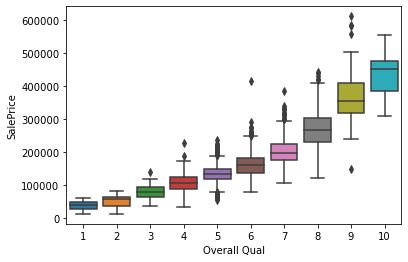

In [33]:
#used in modeling
sns.boxplot(complete_housing_data['Overall Qual'],complete_housing_data['SalePrice']);

In [34]:
overall_qual_dummies = pd.get_dummies(complete_housing_data["Overall Qual"])
display(
    overall_qual_dummies.sum().sort_values()
)

1       3
2       9
10     21
3      28
9      75
4     156
8     248
7     427
6     498
5     558
dtype: int64

Definately want to include this data in model. Extremely linear with Overall Quality

## Overall Cond Visualization

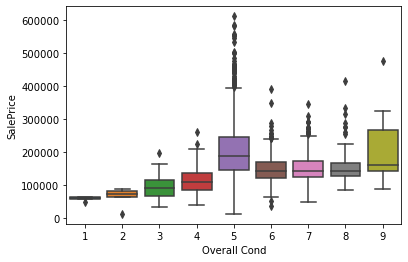

In [35]:
#too many points in 5 (if wanted to use would need to split 5 and all other groups)
sns.boxplot(complete_housing_data['Overall Cond'],complete_housing_data['SalePrice']);

## Year Build

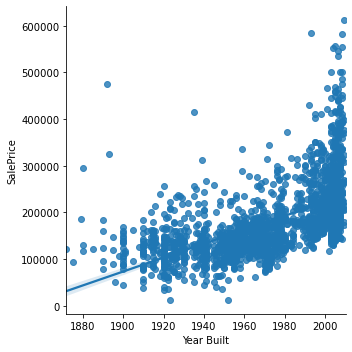

In [36]:
sns.lmplot(x='Year Built',y='SalePrice',data=complete_housing_data);

## Year Remod/Add

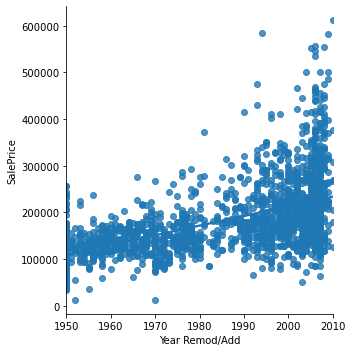

In [37]:
sns.lmplot(x='Year Remod/Add',y='SalePrice',data=complete_housing_data);

There does seem to be a trend towards newer houses selling for more. Included to help model determine that newer houses should sell for more

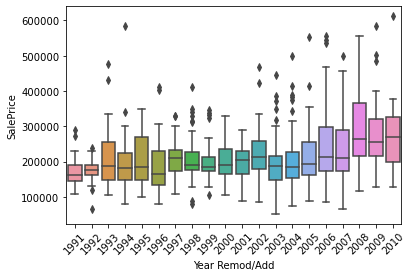

In [38]:
chart = sns.boxplot(complete_housing_data[complete_housing_data["Year Remod/Add"] > 1990]["Year Remod/Add"],complete_housing_data[complete_housing_data["Year Remod/Add"] > 1990]["SalePrice"])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

## Roof Style

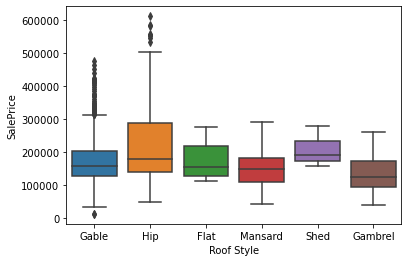

In [39]:
sns.boxplot(complete_housing_data['Roof Style'],complete_housing_data['SalePrice']);

In [40]:
roof_style_dummies = pd.get_dummies(complete_housing_data["Roof Style"])
display(
    roof_style_dummies.sum().sort_values()
)

Shed          3
Mansard       7
Flat         10
Gambrel      12
Hip         388
Gable      1603
dtype: int64

Don't think I want to include this in model. Average in all columns is about the same

## Roof Matl

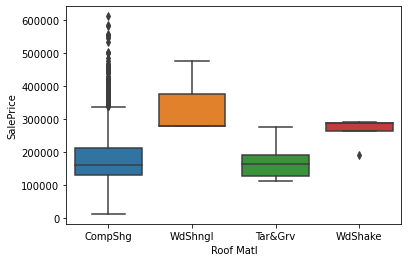

In [41]:
sns.boxplot(complete_housing_data['Roof Matl'],complete_housing_data['SalePrice']);

In [42]:
roof_matl_dummies = pd.get_dummies(complete_housing_data["Roof Matl"])
display(
    roof_matl_dummies.sum().sort_values()
)

WdShngl       3
WdShake       4
Tar&Grv      12
CompShg    2004
dtype: int64

Not sure if there are enough points in roof matl to include it in model

## Exterior 1st

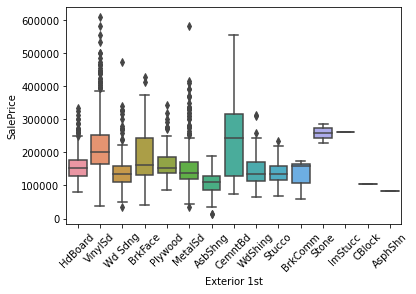

In [43]:
#used in model to help differenciate houses
plt.figure(figsize=(6,4))
chart = sns.boxplot(complete_housing_data['Exterior 1st'],complete_housing_data['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

In [44]:
exterior_1_dummies = pd.get_dummies(complete_housing_data["Exterior 1st"])
display(
    exterior_1_dummies.sum().sort_values()
)
#Removing the "AsphShn","CBlock","ImStucc","Stone","BrkComm" from the dummy cells as there isn't enough data
exterior_1_dummies.drop(columns=["AsphShn","CBlock","ImStucc","Stone","BrkComm"],inplace=True)

AsphShn      1
CBlock       1
ImStucc      1
Stone        2
BrkComm      3
Stucco      26
AsbShng     32
WdShing     44
BrkFace     62
CemntBd     88
Plywood    146
Wd Sdng    269
HdBoard    298
MetalSd    328
VinylSd    722
dtype: int64

Want to include some of these values, but definately not all

## Exterior 2nd

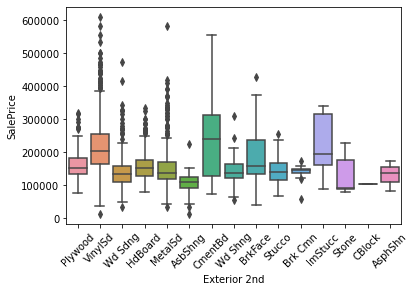

In [45]:
plt.figure(figsize=(6,4))
chart = sns.boxplot(complete_housing_data['Exterior 2nd'],complete_housing_data['SalePrice'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=45);

In [46]:
exterior_2_dummies = pd.get_dummies(complete_housing_data["Exterior 2nd"])
display(
    exterior_2_dummies.sum().sort_values()
)

CBlock       1
AsphShn      3
Stone        5
ImStucc     11
Brk Cmn     17
AsbShng     27
Stucco      29
BrkFace     34
Wd Shng     61
CmentBd     89
Plywood    177
Wd Sdng    257
HdBoard    272
MetalSd    322
VinylSd    718
dtype: int64

## Mas Vnr Type

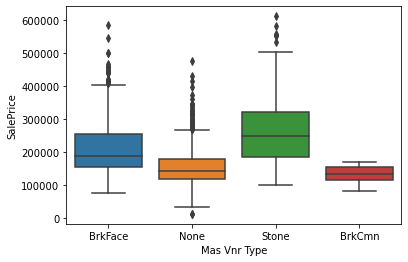

In [47]:
#used in model
sns.boxplot(complete_housing_data['Mas Vnr Type'],complete_housing_data['SalePrice']);

In [48]:
mas_vnr_type_dummies = pd.get_dummies(complete_housing_data["Mas Vnr Type"])
display(
    mas_vnr_type_dummies.sum().sort_values()
)

BrkCmn       12
Stone       162
BrkFace     626
None       1202
dtype: int64

## Mas Vnr Area

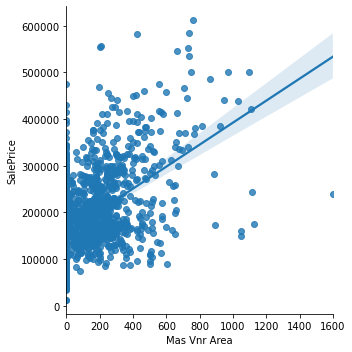

In [49]:
sns.lmplot(x='Mas Vnr Area',y='SalePrice',data=complete_housing_data);

## Exter Qual

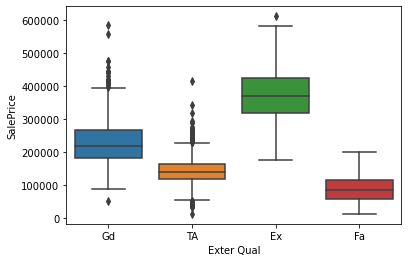

In [50]:
#used in model to separate high and low quality houses
sns.boxplot(complete_housing_data['Exter Qual'],complete_housing_data['SalePrice']);

In [51]:
exter_qual_dummies = pd.get_dummies(complete_housing_data["Exter Qual"])
display(
    exter_qual_dummies.sum().sort_values()
)

Fa      26
Ex      77
Gd     692
TA    1228
dtype: int64

## Exter Cond

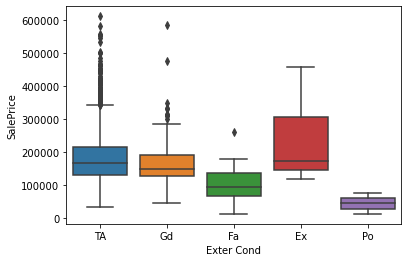

In [52]:
sns.boxplot(complete_housing_data['Exter Cond'],complete_housing_data['SalePrice']);

In [53]:
exter_cond_dummies = pd.get_dummies(complete_housing_data["Exter Cond"])
display(
    exter_cond_dummies.sum().sort_values()
)

Po       2
Ex       7
Fa      48
Gd     214
TA    1752
dtype: int64

## Foundataion

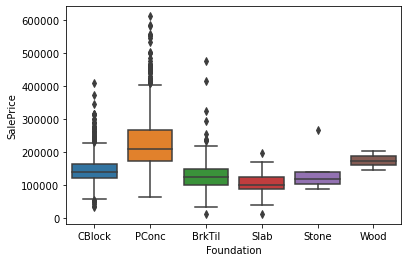

In [54]:
sns.boxplot(complete_housing_data['Foundation'],complete_housing_data['SalePrice']);

In [55]:
foundation_dummies = pd.get_dummies(complete_housing_data["Foundation"])
display(
    foundation_dummies.sum().sort_values()
)
foundation_dummies.drop(columns=["Stone","Wood"],inplace=True)

Wood        2
Stone       5
Slab       33
BrkTil    220
CBlock    845
PConc     918
dtype: int64

## Bsmt Qual

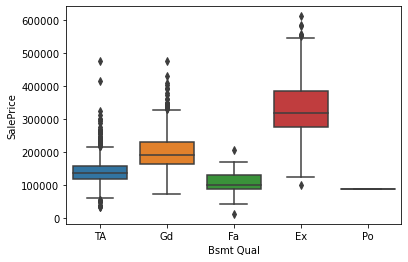

In [56]:
sns.boxplot(complete_housing_data['Bsmt Qual'],complete_housing_data['SalePrice']);

In [57]:
bsmt_qual_dummies = pd.get_dummies(complete_housing_data["Bsmt Qual"])
display(
    bsmt_qual_dummies.sum().sort_values()
)

Po      1
Fa     60
Ex    180
Gd    851
TA    880
dtype: int64

This is important and definately should be included in the model

## Bsmt Cond

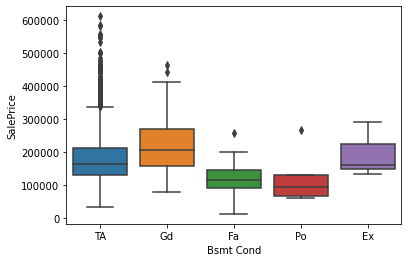

In [58]:
sns.boxplot(complete_housing_data['Bsmt Cond'],complete_housing_data['SalePrice']);

In [59]:
bsmt_cond_dummies = pd.get_dummies(complete_housing_data["Bsmt Cond"])
display(
    bsmt_cond_dummies.sum().sort_values()
)

Ex       3
Po       5
Fa      65
Gd      87
TA    1812
dtype: int64

## Bsmt Exposure

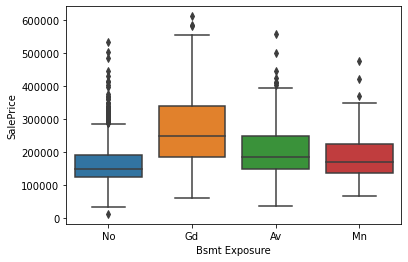

In [60]:
sns.boxplot(complete_housing_data['Bsmt Exposure'],complete_housing_data['SalePrice']);

In [61]:
bsmt_exposure_dummies = pd.get_dummies(complete_housing_data["Bsmt Exposure"])
display(
    bsmt_exposure_dummies.sum().sort_values()
)

Mn     162
Gd     189
Av     284
No    1334
dtype: int64

## BsmtFin Type 1

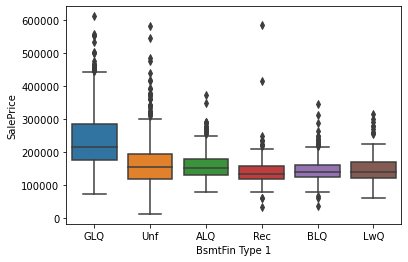

In [62]:
sns.boxplot(complete_housing_data['BsmtFin Type 1'],complete_housing_data['SalePrice']);

In [63]:
bsmtfin_type1_dummies = pd.get_dummies(complete_housing_data["BsmtFin Type 1"])
display(
    bsmtfin_type1_dummies.sum().sort_values()
)

LwQ    101
Rec    180
BLQ    195
ALQ    288
Unf    601
GLQ    607
dtype: int64

## BsmtFin SF 1

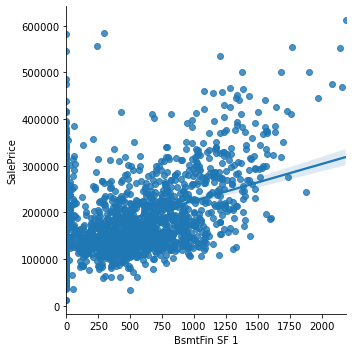

In [64]:
sns.lmplot(x='BsmtFin SF 1',y='SalePrice',data=complete_housing_data);

## BsmtFin Type 2

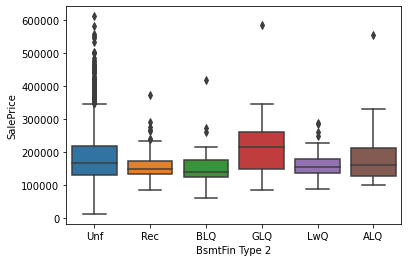

In [65]:
sns.boxplot(complete_housing_data['BsmtFin Type 2'],complete_housing_data['SalePrice']);

In [66]:
bsmtfin_type2_dummies = pd.get_dummies(complete_housing_data["BsmtFin Type 2"])
display(
    bsmtfin_type2_dummies.sum().sort_values()
)

GLQ      22
ALQ      35
BLQ      48
LwQ      60
Rec      78
Unf    1728
dtype: int64

## BsmtFin SF 2

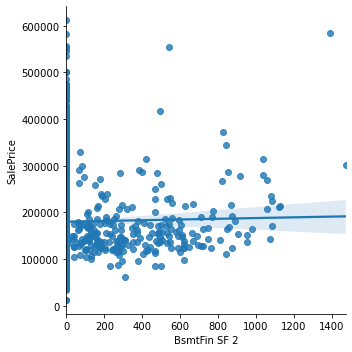

In [67]:
sns.lmplot(x='BsmtFin SF 2',y='SalePrice',data=complete_housing_data);

## Bsmt Unf SF

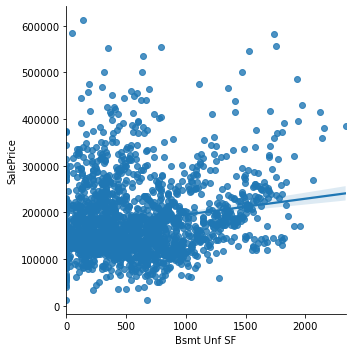

In [68]:
sns.lmplot(x='Bsmt Unf SF',y='SalePrice',data=complete_housing_data);

## Total Bsmt SF 

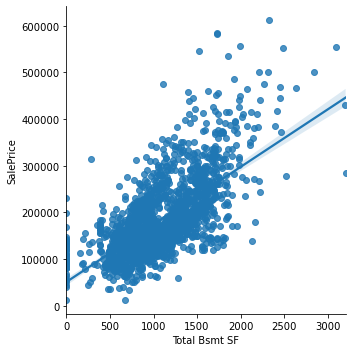

In [69]:
#all of the SF data is combined into Total SF column
sns.lmplot(x='Total Bsmt SF',y='SalePrice',data=complete_housing_data);

## Heating

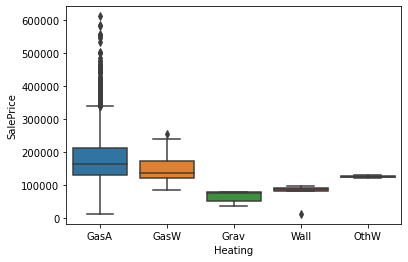

In [70]:
sns.boxplot(complete_housing_data['Heating'],complete_housing_data['SalePrice']);

In [71]:
heating_dummies = pd.get_dummies(complete_housing_data["Heating"])
display(
    heating_dummies.sum().sort_values()
)

OthW       2
Grav       5
Wall       6
GasW      19
GasA    1991
dtype: int64

## Heating QC

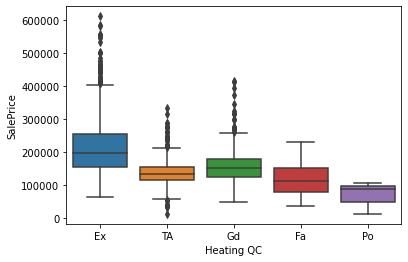

In [72]:
sns.boxplot(complete_housing_data['Heating QC'],complete_housing_data['SalePrice']);

In [73]:
heatingqc_dummies = pd.get_dummies(complete_housing_data["Heating QC"])
display(
    heatingqc_dummies.sum().sort_values()
)

Po       3
Fa      66
Gd     316
TA     586
Ex    1052
dtype: int64

## Central Air

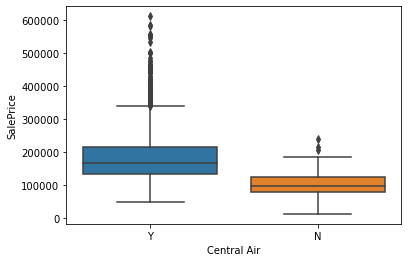

In [74]:
sns.boxplot(complete_housing_data['Central Air'],complete_housing_data['SalePrice']);

In [75]:
centralair_dummies = pd.get_dummies(complete_housing_data["Central Air"])
display(
    centralair_dummies.sum().sort_values()
)

N     140
Y    1883
dtype: int64

## Electrical

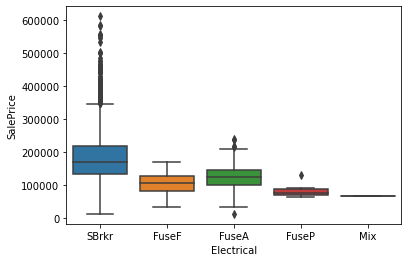

In [76]:
sns.boxplot(complete_housing_data['Electrical'],complete_housing_data['SalePrice']);

In [77]:
electrical_dummies = pd.get_dummies(complete_housing_data["Electrical"])
display(
    electrical_dummies.sum().sort_values()
)

Mix         1
FuseP       7
FuseF      35
FuseA     138
SBrkr    1842
dtype: int64

## 1st Flr SF

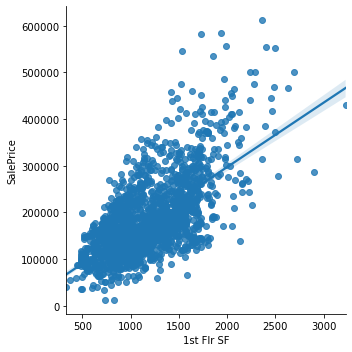

In [78]:
sns.lmplot(x='1st Flr SF',y='SalePrice',data=complete_housing_data);

## 2nd Flr SF

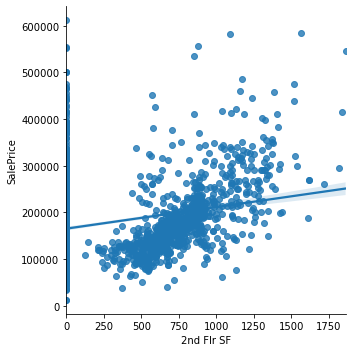

In [79]:
sns.lmplot(x='2nd Flr SF',y='SalePrice',data=complete_housing_data);

## Low Qual Fin SF

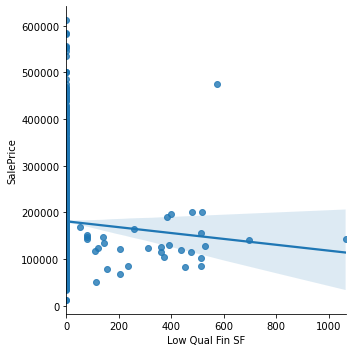

In [80]:
sns.lmplot(x='Low Qual Fin SF',y='SalePrice',data=complete_housing_data);

## Gr Liv Area

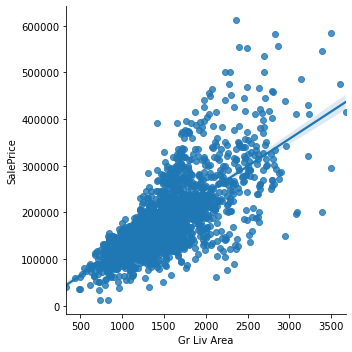

In [81]:
sns.lmplot(x='Gr Liv Area',y='SalePrice',data=complete_housing_data);

# Total SF

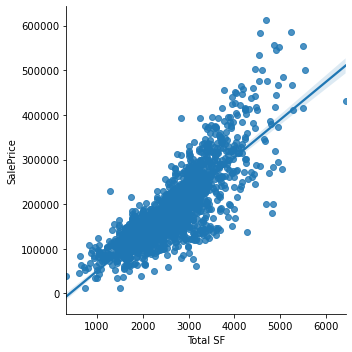

In [82]:
#the most important feature of the model. Is very linear
sns.lmplot(x='Total SF',y='SalePrice',data=complete_housing_data);

## Bsmt Full Bath

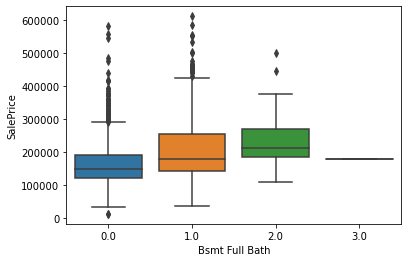

In [83]:
sns.boxplot(complete_housing_data['Bsmt Full Bath'],complete_housing_data['SalePrice']);

In [84]:
bsmt_full_bath_dummies = pd.get_dummies(complete_housing_data["Bsmt Full Bath"])
display(
    bsmt_full_bath_dummies.sum().sort_values()
)

3.0       2
2.0      21
1.0     806
0.0    1194
dtype: int64

## Bsmt Half Bath

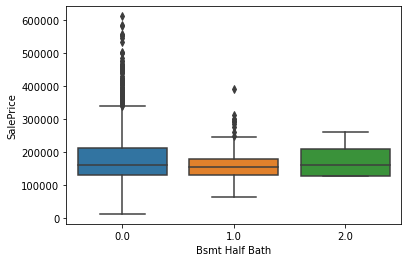

In [85]:
sns.boxplot(complete_housing_data['Bsmt Half Bath'],complete_housing_data['SalePrice']);

Want to make a column with total Basement Bathrooms

## Full Bath

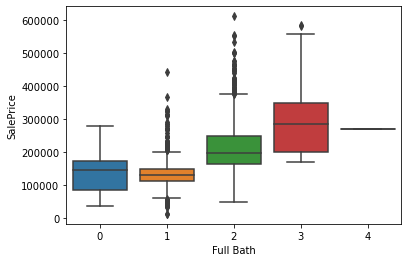

In [86]:
sns.boxplot(complete_housing_data['Full Bath'],complete_housing_data['SalePrice']);

## Half Bath

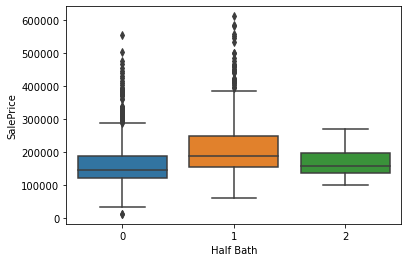

In [87]:
sns.boxplot(complete_housing_data['Half Bath'],complete_housing_data['SalePrice']);

## Total Bathrooms

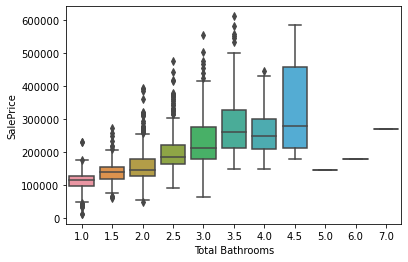

In [88]:
#Total Bathroom is a better indicator of house price than bedrooms as most houses dont have superfluous bathrooms
sns.boxplot(complete_housing_data['Total Bathrooms'],complete_housing_data['SalePrice']);

like the addition of total bathrooms. Need to exclude 5,6,7 as there is only 1 point in each column

## Bedroom AbvGr

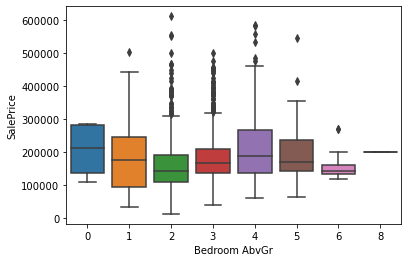

In [89]:
sns.boxplot(complete_housing_data['Bedroom AbvGr'],complete_housing_data['SalePrice']);

## Kitchen AbvGr

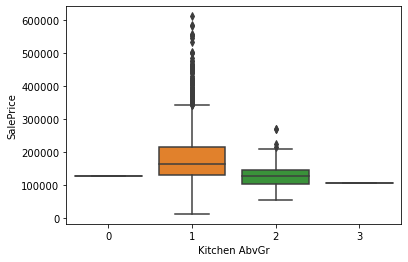

In [90]:
sns.boxplot(complete_housing_data['Kitchen AbvGr'],complete_housing_data['SalePrice']);

## Kitchen Qual

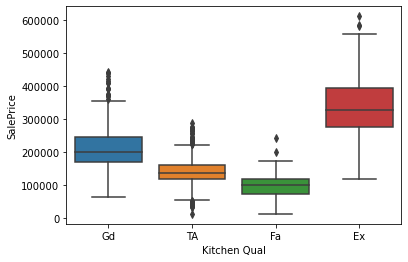

In [91]:
#kitchen qual help differenciate the good houses from the excelent ones
sns.boxplot(complete_housing_data['Kitchen Qual'],complete_housing_data['SalePrice']);

In [92]:
kitchen_qual_dummies = pd.get_dummies(complete_housing_data["Kitchen Qual"])
display(
    kitchen_qual_dummies.sum().sort_values()
)

Fa      47
Ex     146
Gd     796
TA    1034
dtype: int64

## TotRms AbvGrd

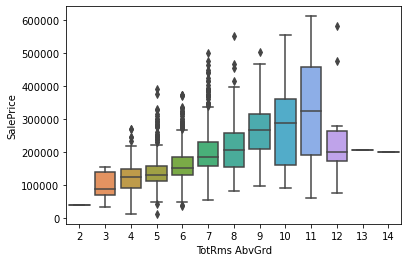

In [93]:
sns.boxplot(complete_housing_data['TotRms AbvGrd'],complete_housing_data['SalePrice']);

## Functional

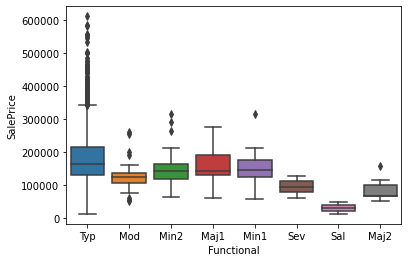

In [94]:
sns.boxplot(complete_housing_data['Functional'],complete_housing_data['SalePrice']);

In [95]:
functional_dummies = pd.get_dummies(complete_housing_data["Functional"])
display(
    functional_dummies.sum().sort_values()
)

Sal        2
Sev        2
Maj2       7
Maj1      11
Mod       25
Min1      38
Min2      42
Typ     1896
dtype: int64

## Fireplaces

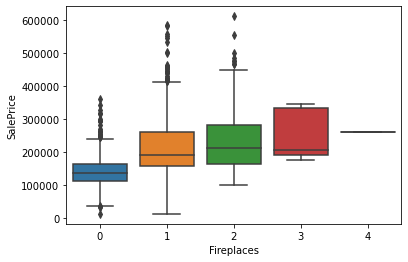

In [96]:
sns.boxplot(complete_housing_data['Fireplaces'],complete_housing_data['SalePrice']);

In [97]:
fireplace_dummies = pd.get_dummies(complete_housing_data["Fireplaces"])
display(
    fireplace_dummies.sum().sort_values()
)

4      1
3      5
2    132
1    891
0    994
dtype: int64

## Fireplace Qu

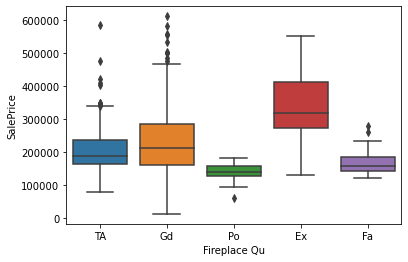

In [98]:
sns.boxplot(complete_housing_data['Fireplace Qu'],complete_housing_data['SalePrice']);

In [99]:
fireplaceQu_dummies = pd.get_dummies(complete_housing_data["Fireplace Qu"])
display(
    fireplaceQu_dummies.sum().sort_values()
)

Ex     31
Po     31
Fa     58
TA    398
Gd    511
dtype: int64

## Garage Type

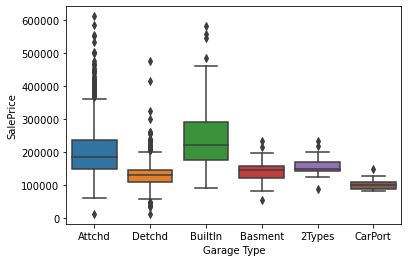

In [100]:
sns.boxplot(complete_housing_data['Garage Type'],complete_housing_data['SalePrice']);

In [101]:
garage_type_dummies = pd.get_dummies(complete_housing_data["Garage Type"])
display(
    garage_type_dummies.sum().sort_values()
)

CarPort      11
2Types       16
Basment      27
BuiltIn     131
Detchd      532
Attchd     1193
dtype: int64

## Garage Yr Blt

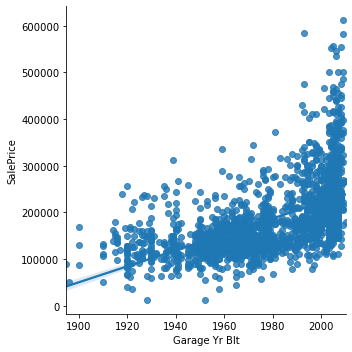

In [102]:
sns.lmplot(x='Garage Yr Blt',y='SalePrice',data=complete_housing_data);

## Garage Finish

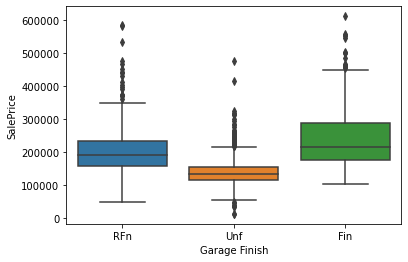

In [103]:
sns.boxplot(complete_housing_data['Garage Finish'],complete_housing_data['SalePrice']);

## Garage Cars

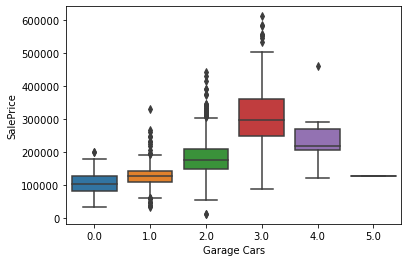

In [104]:
sns.boxplot(complete_housing_data['Garage Cars'],complete_housing_data['SalePrice']);

In [105]:
garage_cars_dummies = pd.get_dummies(complete_housing_data["Garage Cars"])
display(
    garage_cars_dummies.sum().sort_values()
)

5.0       1
4.0      11
0.0     113
3.0     257
1.0     522
2.0    1119
dtype: int64

## Garage Area

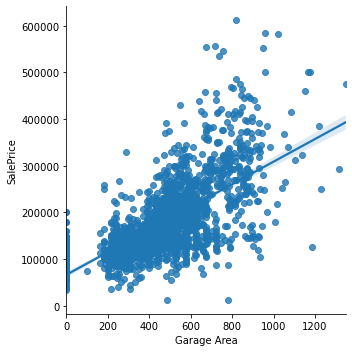

In [106]:
sns.lmplot(x='Garage Area',y='SalePrice',data=complete_housing_data);

## Garage Qual

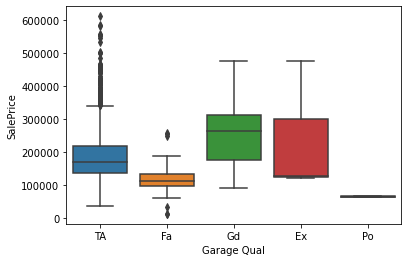

In [107]:
sns.boxplot(complete_housing_data['Garage Qual'],complete_housing_data['SalePrice']);

In [108]:
garage_qual_dummies = pd.get_dummies(complete_housing_data["Garage Qual"])
display(
    garage_qual_dummies.sum().sort_values()
)

Po       2
Ex       3
Gd      17
Fa      81
TA    1807
dtype: int64

## Garage Cond

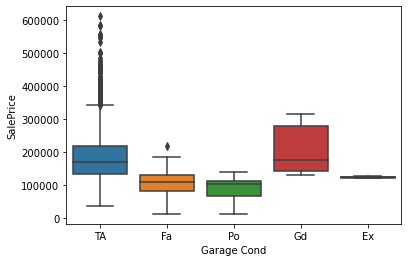

In [109]:
sns.boxplot(complete_housing_data['Garage Cond'],complete_housing_data['SalePrice']);

In [110]:
garage_cond_dummies = pd.get_dummies(complete_housing_data["Garage Cond"])
display(
    garage_cond_dummies.sum().sort_values()
)

Ex       2
Po       8
Gd      12
Fa      47
TA    1841
dtype: int64

## Paved Drive

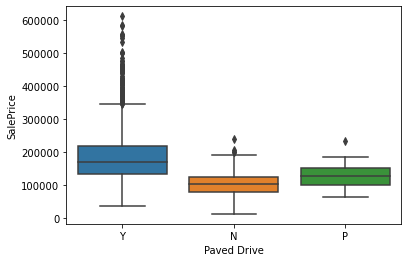

In [111]:
sns.boxplot(complete_housing_data['Paved Drive'],complete_housing_data['SalePrice']);

In [112]:
paved_drive_dummies = pd.get_dummies(complete_housing_data["Paved Drive"])
display(
    paved_drive_dummies.sum().sort_values()
)

P      38
N     147
Y    1838
dtype: int64

## Wood Deck SF

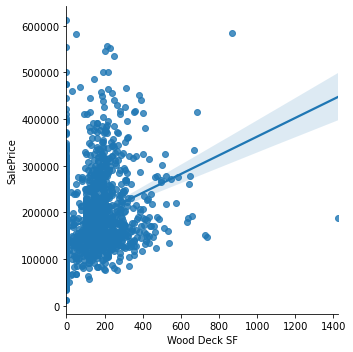

In [113]:
sns.lmplot(x="Wood Deck SF",y='SalePrice',data=complete_housing_data);

## Open Porch SF

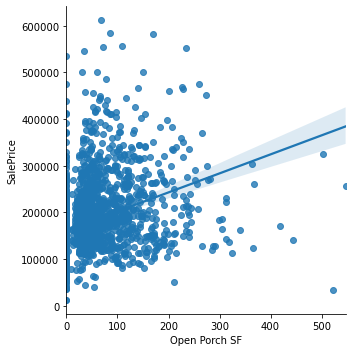

In [114]:
sns.lmplot(x='Open Porch SF',y='SalePrice',data=complete_housing_data);

## Enclosed Porch

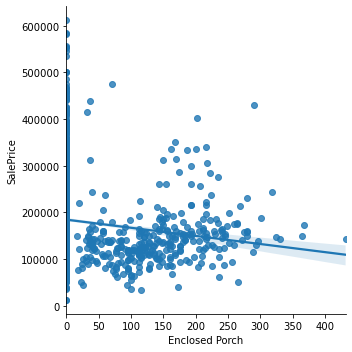

In [115]:
sns.lmplot(x='Enclosed Porch',y='SalePrice',data=complete_housing_data);

## 3Ssn Porch

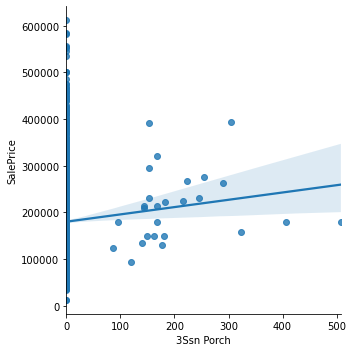

In [116]:
sns.lmplot(x='3Ssn Porch',y='SalePrice',data=complete_housing_data);

## Screen Porch

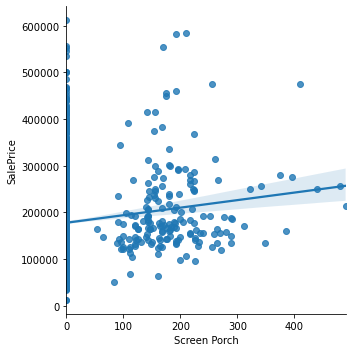

In [117]:
sns.lmplot(x='Screen Porch',y='SalePrice',data=complete_housing_data);

## Pool Area

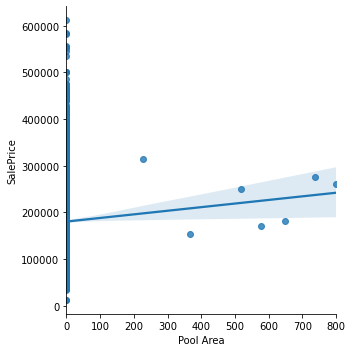

In [118]:
sns.lmplot(x='Pool Area',y='SalePrice',data=complete_housing_data);

## Pool QC

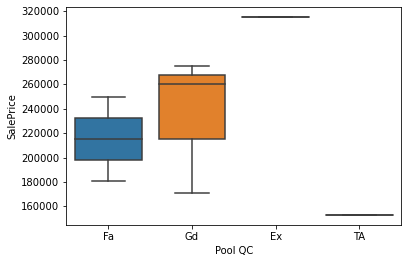

In [119]:
sns.boxplot(complete_housing_data['Pool QC'],complete_housing_data['SalePrice']);

## Fence

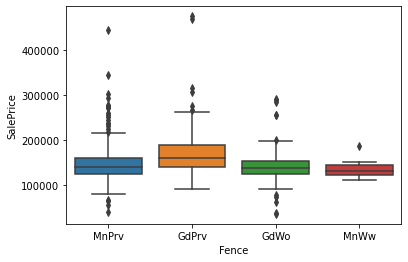

In [120]:
sns.boxplot(complete_housing_data['Fence'],complete_housing_data['SalePrice']);

In [121]:
fence_dummies = pd.get_dummies(complete_housing_data["Fence"])
display(
    fence_dummies.sum().sort_values()
)

MnWw      10
GdWo      80
GdPrv     82
MnPrv    225
dtype: int64

## Misc Feature

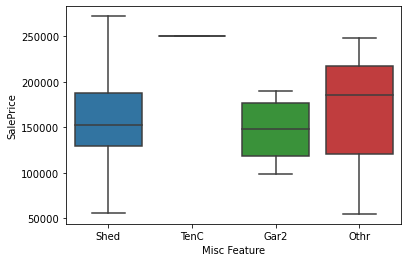

In [122]:
sns.boxplot(complete_housing_data['Misc Feature'],complete_housing_data['SalePrice']);

## Misc Val

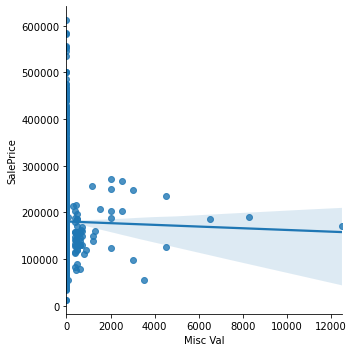

In [123]:
sns.lmplot(x='Misc Val',y='SalePrice',data=complete_housing_data);

## Mo Sold

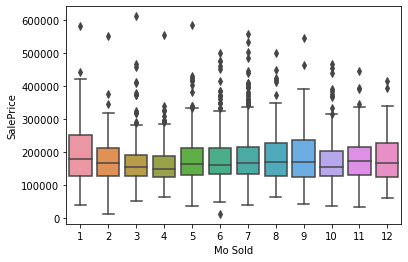

In [124]:
sns.boxplot(complete_housing_data['Mo Sold'],complete_housing_data['SalePrice']);

## Yr Sold

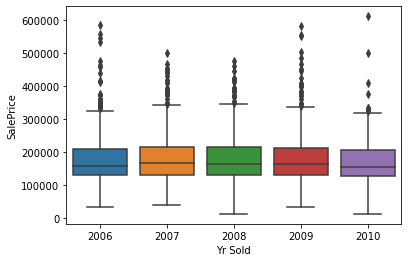

In [125]:
sns.boxplot(complete_housing_data['Yr Sold'],complete_housing_data['SalePrice']);

## Sale Type

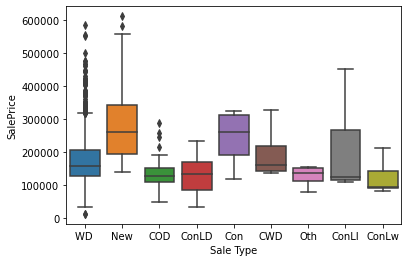

In [126]:
sns.boxplot(complete_housing_data['Sale Type'],complete_housing_data['SalePrice']);

In [127]:
sale_type_dummies = pd.get_dummies(complete_housing_data["Sale Type"])
display(
    sale_type_dummies.sum().sort_values()
)
sale_type_dummies.drop(columns=["Con","Oth","ConLI","ConLw"],inplace=True)

Con         4
Oth         4
ConLw       5
ConLI       7
CWD        10
ConLD      16
COD        63
New       157
WD       1757
dtype: int64

# Feature Engineering

In [128]:
xvars = ["Lot Area","Overall Qual","Overall Cond","Year Remod/Add","Total SF","Total Bathrooms","Fireplaces","Garage Area"]

In [129]:
X = complete_housing_data[xvars]
y = complete_housing_data["SalePrice"]

In [130]:
poly = PolynomialFeatures(include_bias=False)

In [131]:
X_poly = poly.fit_transform(X)

In [132]:
df_X_poly = pd.DataFrame(X_poly, columns=poly.get_feature_names(xvars))

In [133]:
df_X_poly_complete = pd.concat([df_X_poly,y],axis=1)

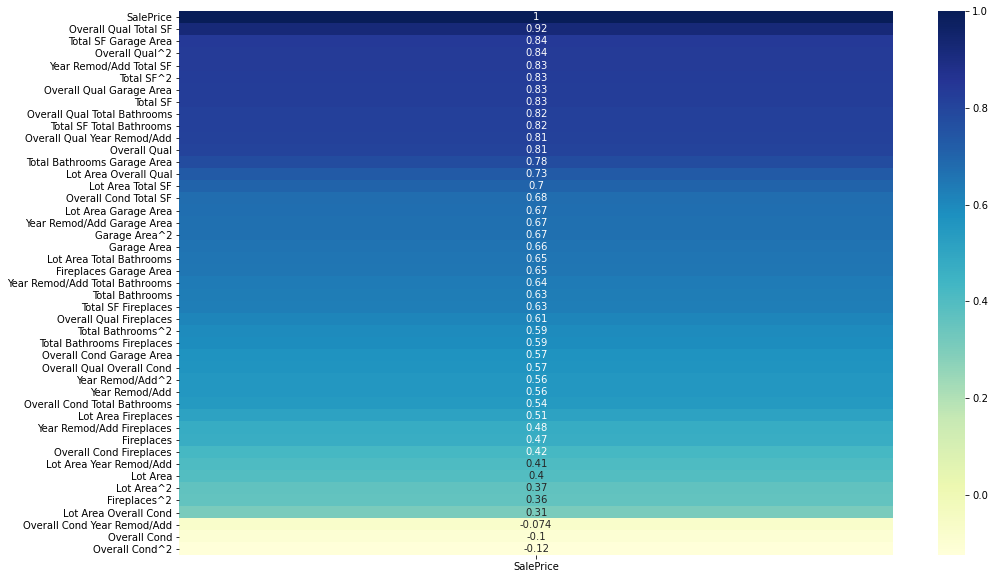

In [134]:
plt.figure(figsize=(16,10))
sns.heatmap(df_X_poly_complete.corr()[["SalePrice"]].sort_values(by="SalePrice",ascending=False),
            annot=True,
            cmap='YlGnBu',
            annot_kws={'fontsize':10});

| Columns that I need to create | --- | --- | --- |---|
| --- | --- |--- | --- |---|
| Overall Qual x Total SF | Total SF x Garage Area | Overall Qual^2 | Year Remod/Add x Total SF | Total Sf^2 |
| Overall Qual x Garage Area | Overall Qual x Total Bathrooms | Total SF x Total Bathrooms | Overall Qual x Year Remod/Add | Total Bathrooms x Garage Area|

Want to include Total SF and Overall Qual in modeling as well

In [135]:
#create the 10 rows that have the largest corelation to saleprice
complete_housing_data["Overall Qual x Total SF"] = complete_housing_data["Overall Qual"] * complete_housing_data["Total SF"]
complete_housing_data["Total SF x Garage Area"] = complete_housing_data["Total SF"] * complete_housing_data["Garage Area"]
complete_housing_data["Overall Qual^2"] = complete_housing_data["Overall Qual"] * complete_housing_data["Overall Qual"]
complete_housing_data["Year Remod/Add x Total SF"] = complete_housing_data["Year Remod/Add"] * complete_housing_data["Total SF"]
complete_housing_data["Total SF^2"] = complete_housing_data["Total SF"] * complete_housing_data["Total SF"]
complete_housing_data["Overall Qual x Garage Area"] = complete_housing_data["Overall Qual"] * complete_housing_data["Garage Area"]
complete_housing_data["Overall Qual x Total Bathrooms"] = complete_housing_data["Overall Qual"] * complete_housing_data["Total Bathrooms"]
complete_housing_data["Total SF x Total Bathrooms"] = complete_housing_data["Total SF"] * complete_housing_data["Total Bathrooms"]
complete_housing_data["Overall Qual x Year Remod/Add"] = complete_housing_data["Overall Qual"] * complete_housing_data["Year Remod/Add"]
complete_housing_data["Total Bathrooms x Garage Area"] = complete_housing_data["Total Bathrooms"] * complete_housing_data["Garage Area"]

In [136]:
significant_xvars = ["Overall Qual x Total SF","Total SF x Garage Area","Overall Qual^2",
                     "Year Remod/Add x Total SF","Total SF^2","Overall Qual x Garage Area",
                     "Overall Qual x Total Bathrooms","Total SF x Total Bathrooms","Overall Qual x Year Remod/Add",
                     "Total Bathrooms x Garage Area", "Total SF","Overall Qual"]

In [137]:
numeric_xvars = ["Lot Area","Overall Qual","Overall Cond","Year Remod/Add","Total SF","Total Bathrooms","Fireplaces","Garage Area"]

In [138]:
sig_housing_data = complete_housing_data[significant_xvars]

In [139]:
sig_housing_data = pd.concat([sig_housing_data,complete_housing_data["SalePrice"]],axis=1)

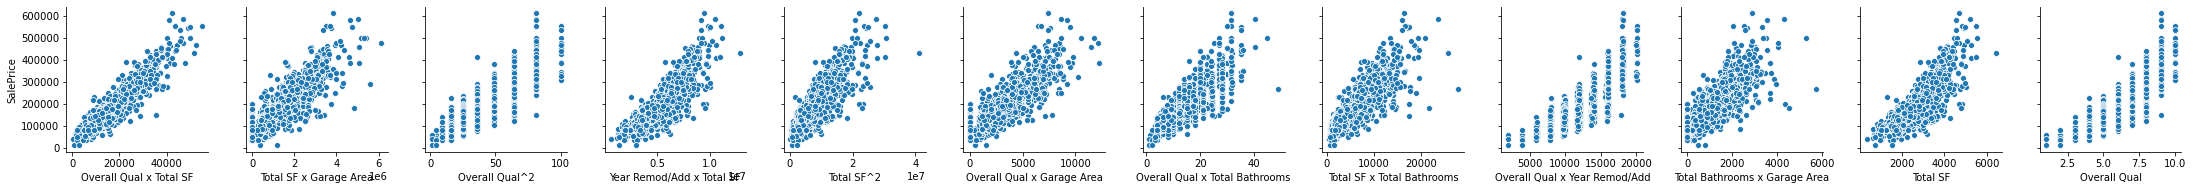

In [140]:
sns.pairplot(sig_housing_data, x_vars = significant_xvars,y_vars="SalePrice");

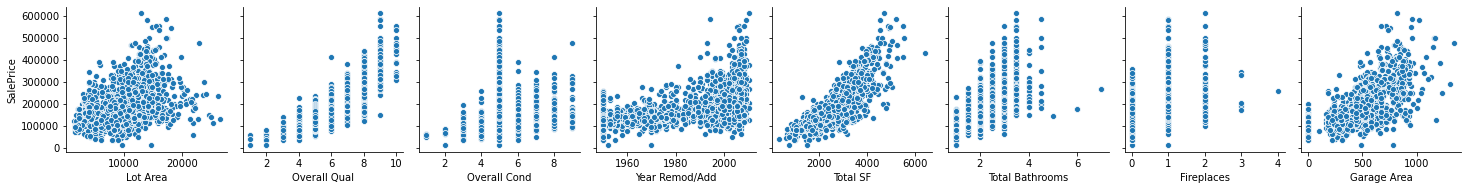

In [141]:
sns.pairplot(complete_housing_data , x_vars = numeric_xvars,y_vars="SalePrice");

In [142]:
display_xvars = ["Total SF","Overall Qual","Overall Qual x Total SF"]

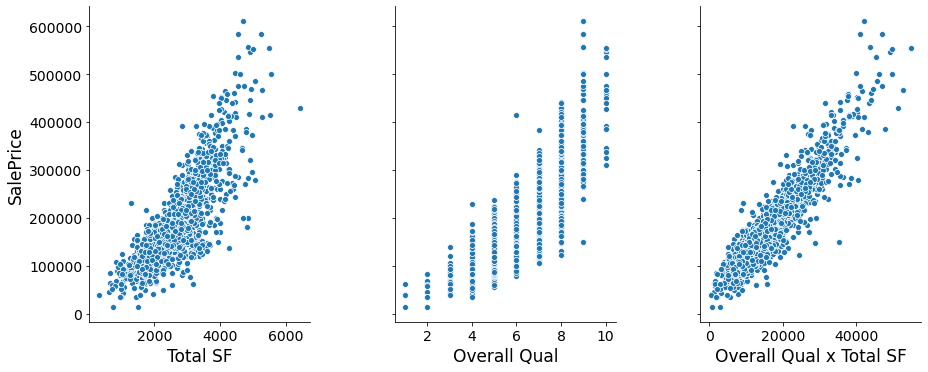

In [143]:
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["xtick.labelsize"] = 14
plt.rcParams["ytick.labelsize"] = 14
g = sns.pairplot(complete_housing_data, x_vars = display_xvars,y_vars="SalePrice")
g.fig.set_size_inches(14,6)

<Figure size 576x576 with 0 Axes>

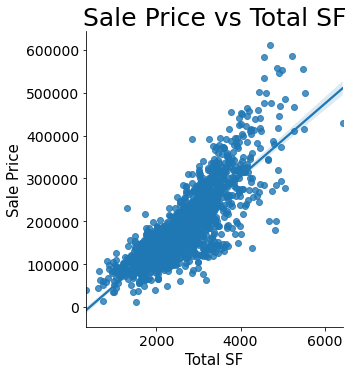

In [144]:
plt.figure(figsize=(8,8))
sns.lmplot(x="Total SF", y="SalePrice",data = complete_housing_data)
plt.title("Sale Price vs Total SF",fontsize=25)
plt.xlabel("Total SF",fontsize=15)
plt.ylabel("Sale Price",fontsize=15);


In comparison the significant housing x vars do a much better job of having a linear relationship with sales price than the just numeric variables do

In [145]:
sig_housing_data_ln = complete_housing_data[significant_xvars]

In [146]:
sig_housing_data_ln = np.log(sig_housing_data_ln)

C:\ProgramData\Anaconda3\envs\dsi\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [147]:
sig_housing_data_ln = pd.concat([sig_housing_data_ln,complete_housing_data["SalePrice"]],axis=1)

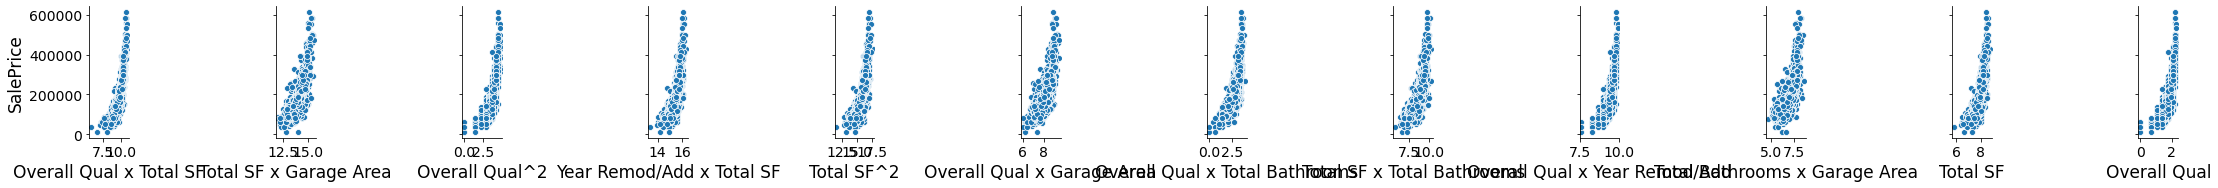

In [148]:
sns.pairplot(sig_housing_data_ln, x_vars = significant_xvars,y_vars="SalePrice");

Taking the natural log of the significant housng xvars doesn't produce a more linear realtionship with sale price

# Importing testing data

In [149]:
testing_data = pd.read_csv('datasets/kaggle_test.csv')

In [150]:
#create the 10 rows that have the largest corelation to saleprice
#do the same thing in testing data
testing_data["Overall Qual x Total SF"] = testing_data["Overall Qual"] * testing_data["Total SF"]
testing_data["Total SF x Garage Area"] = testing_data["Total SF"] * testing_data["Garage Area"]
testing_data["Overall Qual^2"] = testing_data["Overall Qual"] * testing_data["Overall Qual"]
testing_data["Year Remod/Add x Total SF"] = testing_data["Year Remod/Add"] * testing_data["Total SF"]
testing_data["Total SF^2"] = testing_data["Total SF"] * testing_data["Total SF"]
testing_data["Overall Qual x Garage Area"] = testing_data["Overall Qual"] * testing_data["Garage Area"]
testing_data["Overall Qual x Total Bathrooms"] = testing_data["Overall Qual"] * testing_data["Total Bathrooms"]
testing_data["Total SF x Total Bathrooms"] = testing_data["Total SF"] * testing_data["Total Bathrooms"]
testing_data["Overall Qual x Year Remod/Add"] = testing_data["Overall Qual"] * testing_data["Year Remod/Add"]
testing_data["Total Bathrooms x Garage Area"] = testing_data["Total Bathrooms"] * testing_data["Garage Area"]


# Exporting Cleaned Data

In [151]:
complete_housing_data.to_csv("./datasets/complete_training_data.csv",index=False)

In [152]:
testing_data.to_csv("./datasets/complete_kaggle_test.csv",index=False)